# Challenge: Preparing a dataset for modeling
### Unit 2 Lesson 1

## Instructions
Using a dataset of your choice, select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features. Explore the variables using the univariate and bivariate methods you've learned so far.

Next, based on what you learned via your data exploration, create ten new features. Explain the reasoning behind each one.

Finally, use filtering methods to select the five best features and justify your choices.

## Dataset: Arms Trade and Military Power 

Dataset credit:
Trade (Correlates of War) - 

Barbieri, Katherine and Omar M. G. Omar Keshk. 2016. Correlates of War Project Trade Data Set Codebook, Version 4.0. Online: http://correlatesofwar.org. 

Barbieri, Katherine, Omar M. G. Keshk, and Brian Pollins. 2009. “TRADING DATA: Evaluating our Assumptions and Coding Rules.” Conflict Management and Peace Science. 26(5): 471-491.

National Material Capabilities - 
Singer, J. David, Stuart Bremer, and John Stuckey. (1972). "Capability Distribution, Uncertainty, and Major Power War, 1820-1965." in Bruce Russett (ed) Peace, War, and Numbers, Beverly Hills: Sage, 19-48. 


## Variables

- State [CAT]
- Year [CONT, INT]
- Imports (in USD millions) [CONT, RAT]
- Exports (in USD millions) [CONT, RAT]
- Iron and Steel Production (in thousand of tons) [CONT, RAT]
- Military Expenditure (in USD thousands) [CONT, RAT]
- Military Personnel (thousands) [CONT, RAT]
- Energy Consumption (in thousands of coal-ton equivalents) [CONT, RAT]
- Total Population (in thousands) [CONT, RAT]
- Urban Population (from cities with populations greater than 100,000; in thousands) [CONT, RAT]
- CINC (Composite Index of National Capability) Score [CONT, RAT]


## Possible Research Questions:
### Target Variable: Military Expenditure and Net Import/Export

1. What factors can best predict how much money a state will spend on military a given year? 



In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import preprocessing

%matplotlib inline

In [2]:
cow = pd.read_csv('COW.csv')
nmc = pd.read_csv('NMC.csv')

In [3]:
# Merge the two datasets together by country and year. 
df = pd.merge(cow, nmc, on=['ccode','year'], how="left")

In [4]:
# preview dataframes
df.head(5)

,ccode,statename,stateabb_x,year,imports,exports,alt_imports,alt_exports,stateabb_y,milex,milper,irst,pec,tpop,upop,cinc
0,2,United States of America,USA,1870,450.000000,418.000000,NaN,NaN,USA,13128.0,50.0,1692.0,37779.0,39905.0,4130.0,0.099000
1,2,United States of America,USA,1871,534.000000,475.000000,NaN,NaN,USA,11811.0,42.0,1735.0,39546.0,40938.0,4302.0,0.098381
2,2,United States of America,USA,1872,632.000000,474.000000,NaN,NaN,USA,14246.0,42.0,2590.0,48479.0,41972.0,4481.0,0.115283
3,2,United States of America,USA,1873,342.029999,626.590027,NaN,NaN,USA,15014.0,43.0,2602.0,53674.0,43006.0,4667.0,0.116269
4,2,United States of America,USA,1874,576.000000,619.000000,NaN,NaN,USA,12899.0,44.0,2439.0,51736.0,44040.0,4862.0,0.114245


In [5]:
# Make sure all continuous variables are float type. 
df['imports'] = df['imports'].astype(float)
df['exports'] = df['exports'].astype(float)
df['milex'] = df['milex'].astype(float)
df['milper'] = df['milper'].astype(float)
df['cinc'] = df['cinc'].astype(float)
df['pec'] = df['pec'].astype(float)
df['irst'] = df['irst'].astype(float)

## Data Exploration

In [21]:
# Scaling to data. 
df_num = df.select_dtypes(include=[np.number]).dropna()

# Save the column names.
names=df_num.columns

# Scale, then turn the resulting numpy array back into a data frame with the
# correct column names.
df_scaled = pd.DataFrame(preprocessing.scale(df_num), columns=names)

c:\users\kathy trieu\desktop\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  if __name__ == '__main__':


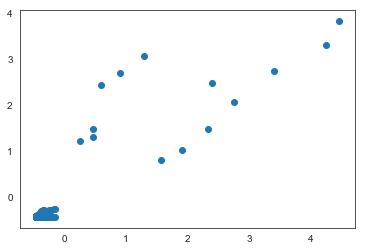

              ccode          year       imports       exports   alt_imports  \
count  8.800000e+01  8.800000e+01  8.800000e+01  8.800000e+01  8.800000e+01   
mean  -1.009294e-17  5.046468e-18  1.009294e-17  2.018587e-17  5.046468e-17   
std    1.005731e+00  1.005731e+00  1.005731e+00  1.005731e+00  1.005731e+00   
min   -4.376997e-01 -1.583654e+00 -4.651338e-01 -4.572357e-01 -4.852666e-01   
25%   -4.376997e-01 -8.227921e-01 -4.478108e-01 -4.412285e-01 -4.609258e-01   
50%   -4.322152e-01 -6.193059e-02 -3.579485e-01 -3.664415e-01 -3.343342e-01   
75%   -4.322152e-01  6.989310e-01 -2.316487e-01 -2.435559e-01 -1.517225e-01   
max    2.299061e+00  2.096793e+00  4.449326e+00  4.355543e+00  4.658519e+00   

        alt_exports      milex        milper          irst           pec  \
count  8.800000e+01  88.000000  8.800000e+01  8.800000e+01  8.800000e+01   
mean   2.018587e-17   0.000000 -6.055762e-17 -2.018587e-17  3.027881e-17   
std    1.005731e+00   1.005731  1.005731e+00  1.005731e+00  

In [41]:
plt.scatter(df_scaled['imports'], df_scaled['milex'])
plt.show()

print(df_scaled.describe())

In [6]:
imports_year = df.groupby('year').describe()['imports']
imports_year = imports_year.reset_index()

milex_year = df.groupby('year').describe()['milex']
milex_year = milex_year.reset_index()
milex_ctry = df.groupby('statename').describe()['milex']
milex_ctry = milex_ctry.reset_index()

In [7]:
milex_us = df[df['statename'] == 'United States of America'][['year', 'milex']].dropna()

AttributeError: 'FacetGrid' object has no attribute 'set_title'

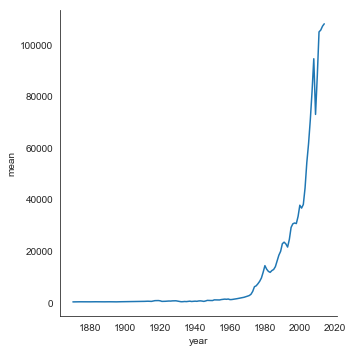

In [8]:
sns.set_style("white")
ax = sns.relplot(x='year', y ='mean', kind='line', data=imports_year)
ax.set_title("World Imports by Year (in USD Millions)")

plt.show()

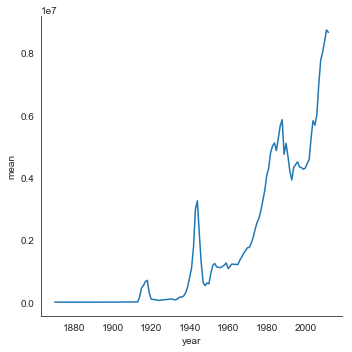

In [37]:
sns.set_style('white')
ax = sns.relplot(x='year', y ='mean', kind='line', data=milex_year)
ax.set_title = ('Military Expenditure by Year (in USD thousands)')

plt.show()

In [ ]:
plt.figure(figsize=(2,1))
sns.catplot(x="statename", y="milex",
            kind="swarm", data=df);
plt.show()

In [33]:
df[df['imports'] > 500000]

,ccode,statename,stateabb_x,year,imports,exports,alt_imports,alt_exports,stateabb_y,milex,milper,irst,pec,tpop,upop,cinc
120,2,United States of America,USA,1990,5.170186e+05,3.931007e+05,NaN,NaN,USA,289755000.0,2180.0,89726.0,2798225.0,249907.0,64116.0,0.141332
121,2,United States of America,USA,1991,5.093197e+05,4.218571e+05,NaN,NaN,USA,262389000.0,2110.0,79738.0,2827021.0,252618.0,64814.0,0.137246
122,2,United States of America,USA,1992,5.526133e+05,4.473859e+05,NaN,NaN,USA,286892000.0,1920.0,84322.0,2856725.0,255391.0,65413.0,0.148314
123,2,United States of America,USA,1993,6.030091e+05,4.659434e+05,NaN,NaN,USA,297600000.0,1810.0,88793.0,2921265.0,258132.0,66072.0,0.153516
124,2,United States of America,USA,1994,6.893710e+05,5.124850e+05,NaN,NaN,USA,293214000.0,1710.0,91244.0,2962511.0,260602.0,66457.0,0.145636
125,2,United States of America,USA,1995,7.710930e+05,5.835651e+05,NaN,NaN,USA,277834000.0,1620.0,95191.0,2996708.0,262755.0,66945.0,0.140337
126,2,United States of America,USA,1996,8.178535e+05,6.230639e+05,NaN,NaN,USA,277254000.0,1570.0,95535.0,3055692.0,265284.0,67433.0,0.138368
127,2,United States of America,USA,1997,8.987126e+05,6.877107e+05,NaN,NaN,USA,276324000.0,1530.0,98485.0,3114015.0,267901.0,68503.0,0.139523
128,2,United States of America,USA,1998,9.446931e+05,6.805222e+05,NaN,NaN,USA,279702000.0,1510.0,98658.0,3126886.0,274028.0,69572.0,0.141644
129,2,United States of America,USA,1999,1.048483e+06,6.907925e+05,NaN,NaN,USA,292147000.0,1490.0,97427.0,3161089.0,276218.0,70642.0,0.142625


TypeError: invalid type comparison

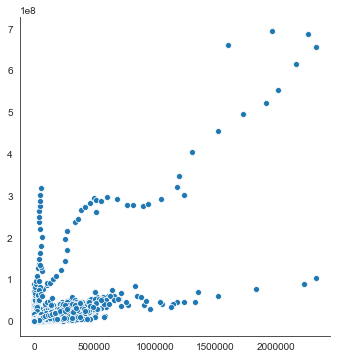

In [43]:
# bivariate exploration (milex & milper)

sns.relplot(x=df['imports'], y=df['milex'], data=df)

Noticed there are two clusters in data comparing milex, imports, exports, and milper. The breakpoint is imports at 500,000,000.

In [ ]:
dfcorr = df.corr()

In [ ]:
sns.heatmap(dfcorr, vmax=.8, square=True, cmap="YlGnBu")

# Feature Engineering


## Variables

- State [CAT]
- Year [CONT, INT]
- Imports (in USD millions) [CONT, RAT]
- Exports (in USD millions) [CONT, RAT]
- Iron and Steel Production (in thousand of tons) [CONT, RAT]
- Military Expenditure (in USD thousands) [CONT, RAT]
- Military Personnel (thousands) [CONT, RAT]
- Energy Consumption (in thousands of coal-ton equivalents) [CONT, RAT]
- Total Population (in thousands) [CONT, RAT]
- Urban Population (from cities with populations greater than 100,000; in thousands) [CONT, RAT]
- CINC (Composite Index of National Capability) Score [CONT, RAT]


## Features
1. "Free" States (determined by Freedom House)
- "Partly Free" States (determined by Freedom House) and "Not Free" States (determined by Freedom House)
- Asia
- North America
- South and Central America
- Europe
- Africa
- Post-Cold War Time Period
- Cold-War Time Period
- Pre-Cold War Time Period
- net imports or net exports
- Materials (Iron and Steel Production & Energy Consumption)
- Military Personnel > 20,000
- Military Personnel <= 20,000

reasoning behind the features

look at data to decide how to break apart the data. is there a natural break point. maybe there would be clusters.


In [ ]:
# what is the target variable?

In [ ]:
# make a chart with correlation between the features and outcome. pick top 5 with highest covariance.

In [ ]:
df['statename'] = df['statename'].astype(str)

In [ ]:
free_states = ['Denmark', 'Palau', 'St. Vincent and Grenadines','Japan','Uruguay','Australia','Dominica',
'Austria','United Kingdom','Finland','Taiwan','Bahamas','Kiribati','Slovenia','Cape Verde','Marshall Islands',
'Netherlands','New Zealand','Sweden','Iceland','Portugal','Tuvalu','Switzerland','Barbados',
'Canada','Costa Rica','Estonia','Belgium','Micronesia','Germany','Spain','Norway', 'Andorra','Ireland','San Marino','Chile','Lithuania','Cyprus','Luxembourg',
'St. Kitts and Nevis','Czech Republic','Italy','St. Lucia','Panama','United States of America','Slovakia','Malta','France','Mauritius',
'Belize','Croatia','Ghana','Greece','Mongolia','Grenada','Liechtenstein','Argentina','Jamaica','Tonga','Nauru','Poland',
'Solomon Islands','Brazil','Romania','Latvia','South Africa','South Korea','Bulgaria','Northern Cyprus','Benin','Samoa','Monaco','Trinidad and Tobago',
'Sao Tome and Principe','Antigua & Barbuda','Vanuatu','Senegal','Guyana', 'Surname','Botswana','Namibia','Peru','El Salvador','India','Tunisia','Israel','Timor-Leste']


In [ ]:
def freedom_function(row):
    if row['statename'] in free_states:
        return "1"
    return "0"

df['free'] = df.apply(lambda row: freedom_function(row), axis=1)

In [ ]:
# Check for accuracy
not_free = df[df['free'] == "0"]

print("partly free and not free states: ", not_free['statename'].unique())

free_test = df[df['free'] == "1"]

print("free states: ", free_test['statename'].unique())

In [35]:
# feature: net import/export

df['net_import'] = df['imports']-df['exports']

df.head(10)

,ccode,statename,stateabb_x,year,imports,exports,alt_imports,alt_exports,stateabb_y,milex,milper,irst,pec,tpop,upop,cinc,net_import
0,2,United States of America,USA,1870,450.000000,418.000000,NaN,NaN,USA,13128.0,50.0,1692.0,37779.0,39905.0,4130.0,0.099000,32.000000
1,2,United States of America,USA,1871,534.000000,475.000000,NaN,NaN,USA,11811.0,42.0,1735.0,39546.0,40938.0,4302.0,0.098381,59.000000
2,2,United States of America,USA,1872,632.000000,474.000000,NaN,NaN,USA,14246.0,42.0,2590.0,48479.0,41972.0,4481.0,0.115283,158.000000
3,2,United States of America,USA,1873,342.029999,626.590027,NaN,NaN,USA,15014.0,43.0,2602.0,53674.0,43006.0,4667.0,0.116269,-284.560028
4,2,United States of America,USA,1874,576.000000,619.000000,NaN,NaN,USA,12899.0,44.0,2439.0,51736.0,44040.0,4862.0,0.114245,-43.000000
5,2,United States of America,USA,1875,533.000000,545.059998,NaN,NaN,USA,11720.0,38.0,2057.0,52194.0,45073.0,5064.0,0.106965,-12.059998
6,2,United States of America,USA,1876,469.000000,565.000000,NaN,NaN,USA,10749.0,41.0,1899.0,51080.0,46107.0,5275.0,0.101917,-96.000000
7,2,United States of America,USA,1877,466.000000,632.000000,NaN,NaN,USA,9074.0,34.0,2100.0,56754.0,47141.0,5495.0,0.104653,-166.000000
8,2,United States of America,USA,1878,453.000000,720.000000,NaN,NaN,USA,11367.0,36.0,2338.0,55588.0,48174.0,5724.0,0.108345,-267.000000
9,2,United States of America,USA,1879,461.000000,730.000000,NaN,NaN,USA,10527.0,38.0,2786.0,67742.0,49208.0,5962.0,0.120333,-269.000000


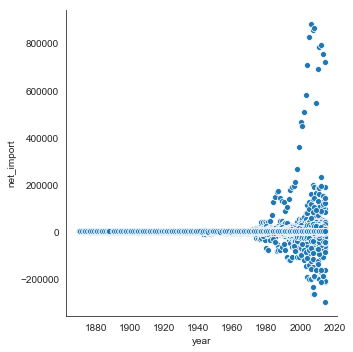

In [36]:
sns.relplot(x='year', y='net_import', data=df)